# **Project Work**


**Equipe**:

**Kelvin Leandro Martins - 540006**

**Pedro Leinos Falcão Cunha - 542114**

## Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import symbols, limit, solve, latex
from scipy import signal
from IPython.display import display, Math
import pandas as pd

!pip install control
import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 11.0 MB/s eta 0:00:00


##0. - Previous analysis

open loop

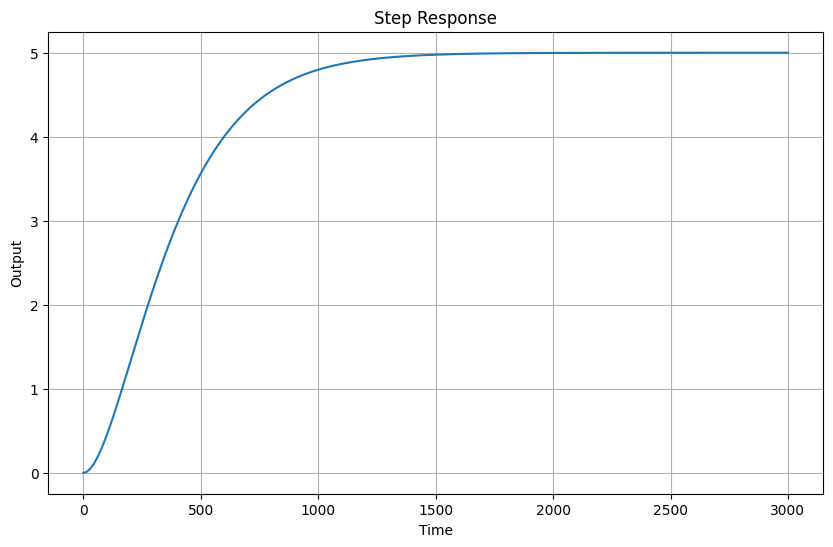

In [ ]:
# previous project work code / result
A = np.array([[-1/200,  0.], [1/200, -1/200]])
B = np.array([[1/20, 0.], [0., 1/20]])
C = np.array([[0., 1.]])
D = np.array([[0., 0.]])

x0 = np.array([0., 0.]) # Initial conditions
x_eq = np.array([5., 5.]) # equilibrium state

# state-space system
ss = signal.StateSpace(A, B, C, D)

# step response
t = np.linspace(0, 3000, 10000)
_, y_linear, x_linear = signal.lsim(ss, U=0, T=t, X0 = x0 - x_eq)

plt.figure(figsize=(10, 6))
plt.plot(t, y_linear + x_eq[1])
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the transfer function H(s) = C*(sI - A)^(-1)*B + D
s = sp.Symbol('s')
I = sp.eye(A.shape[0])  # Identity matrix
H_s = C * (s * I - A).inv() * B + D

# Simplify the transfer function
H_s = sp.simplify(H_s)

# Display the transfer function vector
H_s_latex = sp.latex(H_s[0])
display(Math(f'H(s) = {H_s_latex}'))

<IPython.core.display.Math object>

Closed Loop

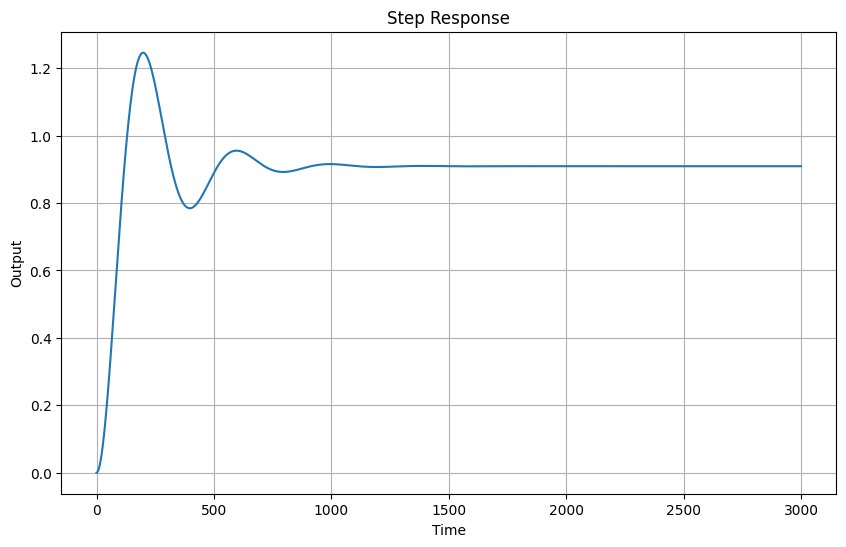

In [ ]:
# Extract the numerator and denominator
num =         [0.00025]
den = [1, 0.01, 2.5e-5]

G = ctrl.TransferFunction(num, den)
H = ctrl.feedback(G, 1)
t = np.linspace(0, 3000, 10000)
t, y = ctrl.step_response(H, T=t)
y *= 1 # step of amplitude 1

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Step Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame({'time': t, 'response': y})

# Max and steady state values
max = df["response"].max()
steady_state = df["response"].iloc[-1]

# Peak time
peak_index = df["response"].idxmax()
peak_time = df["time"].loc[peak_index]

# Overshoot and Damping ratio (zeta) calculation
overshoot = ((max - steady_state) / steady_state)
ln_overshoot = np.log(overshoot)
zeta = -ln_overshoot / np.sqrt(np.pi**2 + ln_overshoot**2)

# Natural frequency (Omega n)
wn = np.pi / (peak_time * np.sqrt(1 - zeta**2))

def find_settling_time_index(df, range_value, steady_state):
  for i in range(len(df) - 1, 0, -1):
    if not (steady_state - range_value <= df["response"].iloc[i-1] <= steady_state + range_value):
      return i
  return 0

# Settling time calculation (2% criterion)
two_perc_range = 0.02 * steady_state
settling_time_index = find_settling_time_index(df, two_perc_range, steady_state)
settling_time = df["time"].loc[settling_time_index]

# Rise time calculation (10% and 90% criterion)
ten_perc = 0.1 * steady_state
ninety_perc = 0.9 * steady_state
time_at_10_perc = df.loc[df["response"] >= ten_perc, "time"].iloc[0]
time_at_90_perc = df.loc[df["response"] >= ninety_perc, "time"].iloc[0]
rise_time = time_at_90_perc - time_at_10_perc

# Transfer function
num = [steady_state * wn**2]
den = [1, 2*zeta*wn, wn**2]
tf = signal.TransferFunction(num, den)

print(f"max: {max}")
print(f"peak_time: {peak_time}")
print(f"steady_state: {steady_state}")
print(f"Damping ratio (zeta): {zeta}")
print(f"Natural frequency (wn): {wn}")
print(f"Rise time: {rise_time}")
print(f"Peak time: {peak_time}")
print(f"Overshoot: {overshoot}")
print(f"Settling time: {settling_time}")
print(f"Transfer Function: {tf}")

max: 1.2457212986378265
peak_time: 198.61986198619863
steady_state: 0.9090912007549993
Damping ratio (zeta): 0.30151186833298593
Natural frequency (wn): 0.016589130169786814
Rise time: 79.50795079507951
Peak time: 198.61986198619863
Overshoot: 0.37029298886982553
Settling time: 677.1677167716772
Transfer Function: TransferFunctionContinuous(
array([0.00025018]),
array([1.00000000e+00, 1.00036393e-02, 2.75199240e-04]),
dt: None
)


In [ ]:
ctrl.step_info(df["response"],T=df["time"])

{'RiseTime': 79.50795079507951,
 'SettlingTime': 677.1677167716772,
 'SettlingMin': 0.7844390653624662,
 'SettlingMax': 1.2457212986378265,
 'Overshoot': 37.02929888698255,
 'Undershoot': 0,
 'Peak': 1.2457212986378265,
 'PeakTime': 198.61986198619863,
 'SteadyStateValue': 0.9090912007549993}

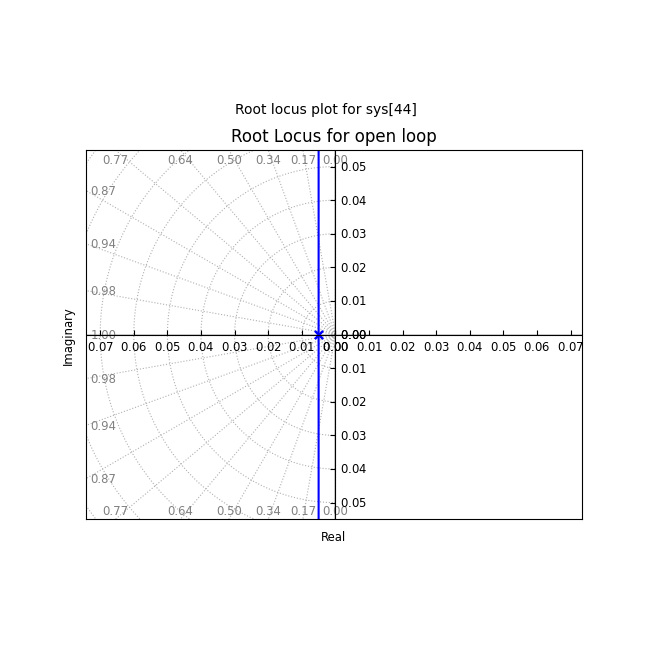

In [ ]:
# Generate the root locus plot
plt.figure()
ctrl.root_locus(G, color='blue')

plt.xlim([-0.001, 0])

# Customize plot (optional)
plt.title("Root Locus for open loop")
plt.grid(True)
plt.show()

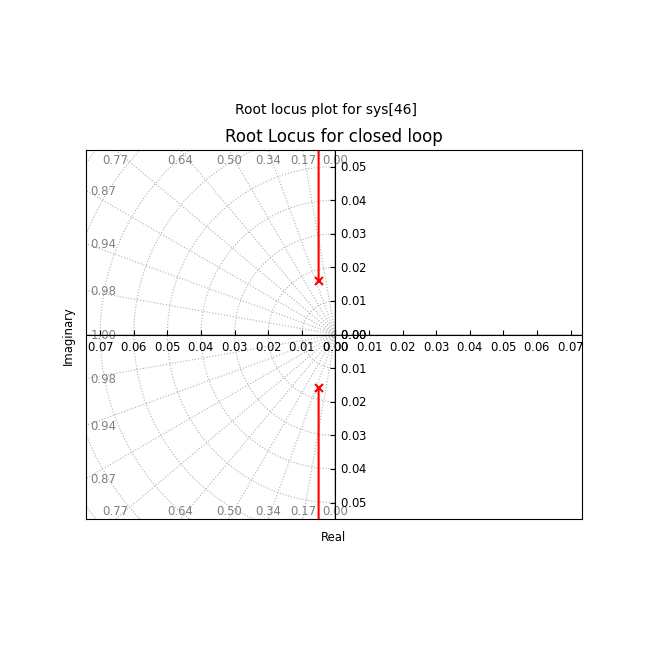

In [ ]:
# Generate the root locus plot
plt.figure()
ctrl.root_locus(H, color='red')

plt.xlim([-0.001, 0])

# Customize plot (optional)
plt.title("Root Locus for closed loop")
plt.grid(True)
plt.show()

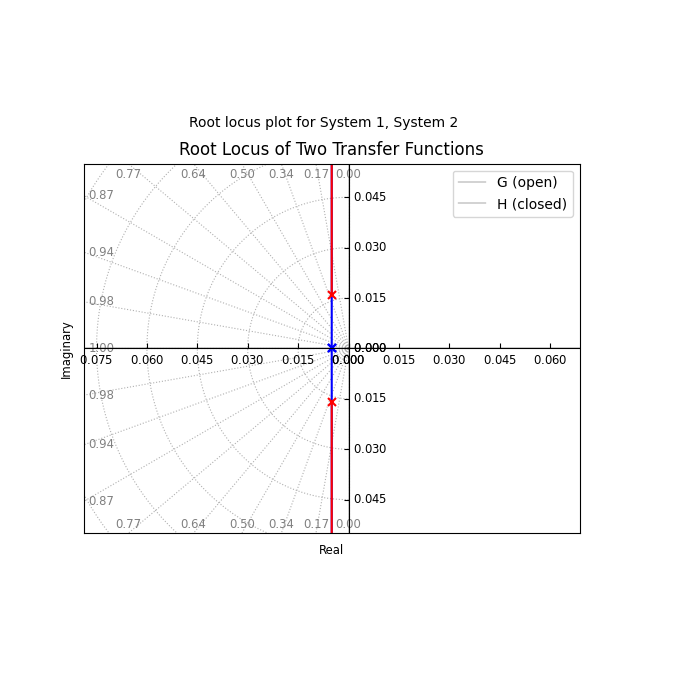

In [ ]:
# Plot root locus of the first transfer function
plt.figure()
ctrl.root_locus(G, label="System 1", color='blue')

# Overlay root locus of the second transfer function
ctrl.root_locus(H, label="System 2", color='red')

plt.xlim([-0.01, 0])

# Customize the plot
plt.title("Root Locus of Two Transfer Functions")
plt.grid(True)
plt.legend(["G (open)", "H (closed)"])
plt.show()

## **Task 3 - System Analysis**

The objective of the third task of the project work is to analyse the dynamic two-tank system developed in the second task.

In this case, you must:

### 1.

Define a simplified block diagram for the level control loop, by identifying the blocks for the level transmitter, the actuator and the system to be controlled.


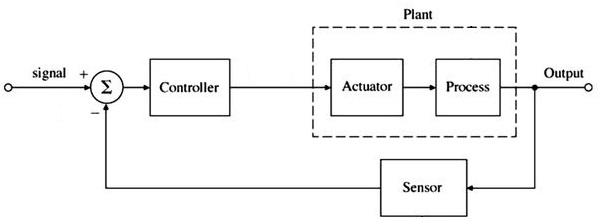

In [ ]:
# Extract the numerator and denominator
num =          [2.5e-4]
den = [1, 0.01, 2.5e-5]

# Create the transfer function G(s) = 0.00025 / (s^2 + 0.01s + 2.5e-5)
G = ctrl.TransferFunction(num, den)

T1 = ctrl.feedback(G, 1)
t = np.linspace(0, 3000, 10000)
t, y1 = ctrl.step_response(T1, T=t)

err1 = (1 - y1[-1]) * 100
print(f"Steady-state error: {err1:.2f}%")

Steady-state error: 9.09%


### 2.

Design a controller to obtain a step-response steady-state error of 10\% without affecting the system's transient response appreciably.

In [ ]:
# Extract the numerator and denominator
num =          [2.5e-4]
den = [1, 0.01, 2.5e-5]

# Create the transfer function G(s) = 0.00025 / (s^2 + 0.01s + 2.5e-5)
G = ctrl.TransferFunction(num, den)

# Calculate the open-loop DC gain of G(s)
Kpo = ctrl.dcgain(G)

# Set the desired steady-state error (err = 0.00005)
err = 5e-5

# Calculate the proportional gain for the LAG controller (Kp)
Kpn = (1 - err) / err

# Define the pole of the LAG controller
pc = 1e-6

# Calculate the zero of the LAG controller (zc) based on the ratio Kpn/Kpo and pole pc
zc = (Kpn / Kpo) * pc

# Create the LAG controller transfer function: LAG(s) = (s + zc) / (s + pc)
LAG = ctrl.TransferFunction([1, zc], [1, pc])

# Create the closed-loop system T2 with feedback: T2 = LAG(s) * G(s) / (1 + LAG(s) * G(s))
T2 = ctrl.feedback(LAG * G, 1)
t = np.linspace(0, 3000, 10000)
t, y2 = ctrl.step_response(T2, T=t)

err2 = (1 - y2[-1]) * 100
print(f"Steady-state error: {err2:.2f}%")

Steady-state error: 0.02%


### 3.

Simulate the system with and without control using the programming language of your choice.

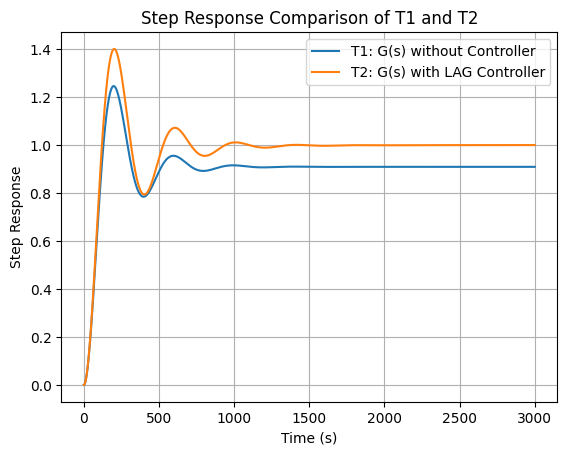

In [ ]:
# Plotting both step responses on the same plot
plt.plot(t, y1, label='T1: G(s) without Controller')
plt.plot(t, y2, label='T2: G(s) with LAG Controller')

# Adding labels and title
plt.title('Step Response Comparison of T1 and T2')
plt.xlabel('Time (s)')
plt.ylabel('Step Response')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

### 4.

Comment your choices and the results.

In [ ]:
print(f"pipipi popopo")

pipipi popopo


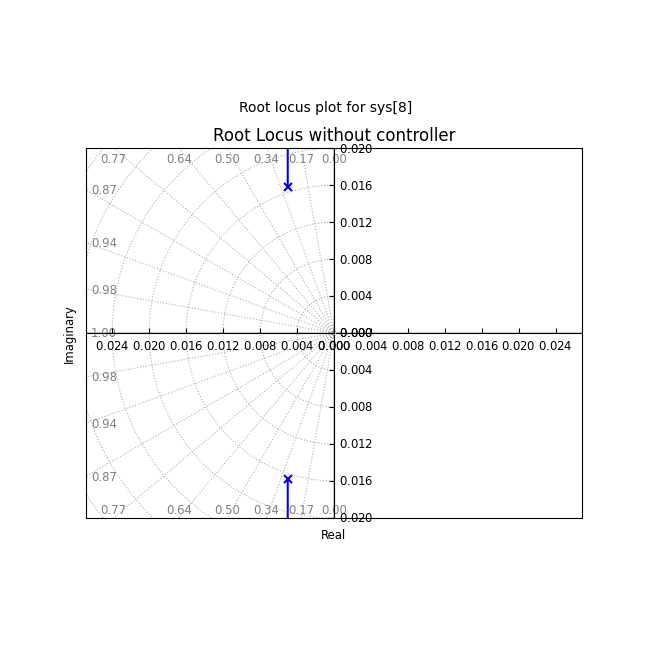

In [ ]:
# Generate the root locus plot
plt.figure()
ctrl.root_locus(T1, color='blue')

plt.xlim(-0.01, 0.01)
plt.ylim(-0.02, 0.02)

# Customize plot (optional)
plt.title("Root Locus without controller")
plt.grid(True)
plt.show()

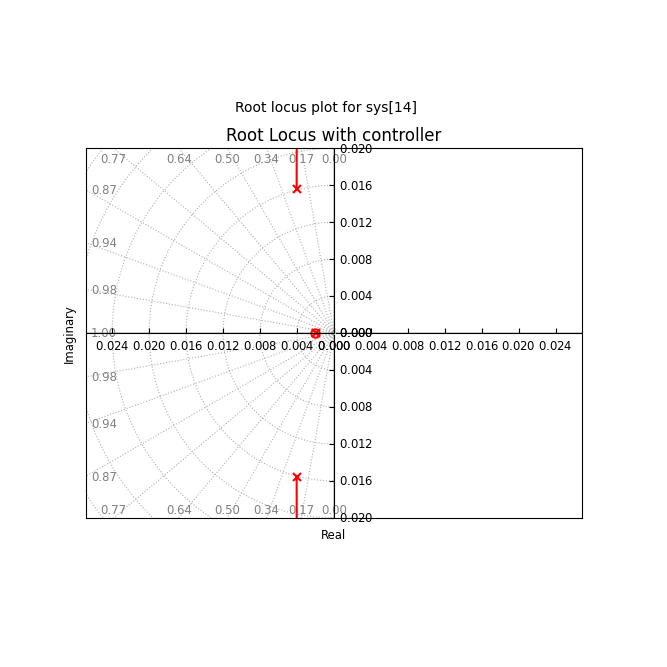

In [ ]:
# Generate the root locus plot
plt.figure()
ctrl.root_locus(T2, color='red')

plt.xlim(-0.01, 0.01)
plt.ylim(-0.02, 0.02)

# Customize plot (optional)
plt.title("Root Locus with controller")
plt.grid(True)
plt.show()

### 5. LISTING SECRETO (parabéns por chegar até aqui rsrs)

Steady-state error: 0.38%


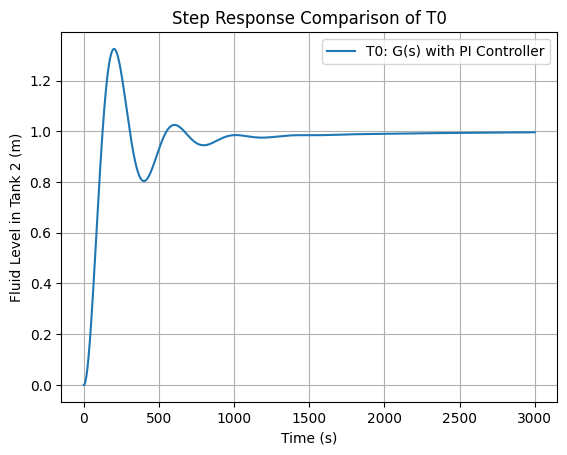

In [ ]:
# LISTING SECRETO

# Extract the numerator and denominator
num =          [2.5e-4]
den = [1, 0.01, 2.5e-5]

# Create the transfer function G(s) = 0.00025 / (s^2 + 0.01s + 2.5e-5)
G = ctrl.TransferFunction(num, den)
PI = ctrl.TransferFunction([1, 0.001], [1, 0])

T0 = ctrl.feedback(PI*G, 1)
t = np.linspace(0, 3000, 10000)
t, y0 = ctrl.step_response(T0, T=t)

err0 = (1 - y0[-1]) * 100
print(f"Steady-state error: {err0:.2f}%")

# Plotting both step responses on the same plot
plt.plot(t, y0, label='T0: G(s) with PI Controller')

# Adding labels and title
plt.title('Step Response Comparison of T0')
plt.xlabel('Time (s)')
plt.ylabel('Fluid Level in Tank 2 (m)')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()